<script async src="https://www.googletagmanager.com/gtag/js?id=UA-59152712-8"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-59152712-8');
</script>

# Radial Oscillation Solver

## Authors: Phil Chang

Can work for any TOV star.

[comment]: <> (Introduction: TODO)

<a id='toc'></a>

# Table of Contents
$$\label{toc}$$

This notebook is organized as follows:

1. [Step 1](#initializenrpy): Initialize core Python/NRPy+ modules
1. [Step 2](#initializetov): Make a Model TOV Star using `TOV.TOV_Solver` NRPy+ module
1. [Step 3](#oscillations): Radial Oscillations
1. [Step 4](#latex_pdf_output): Output this notebook to $\LaTeX$-formatted PDF file

<a id='initializenrpy'></a>

# Step 1: Initialize core Python/NRPy+ modules \[Back to [top](#toc)\]
$$\label{initializenrpy}$$

In [1]:
# Step 1: Import needed Python/NRPy+ modules
import numpy as np                  # NumPy: A numerical methods module for Python
import scipy.integrate as si        # SciPy: Python module for mathematics, science, and engineering applications
import math, sys                    # Standard Python modules for math; multiplatform OS-level functions
import TOV.Polytropic_EOSs as ppeos # NRPy+: Piecewise polytrope equation of state support

<a id='initializetov'></a>

# Step 2: Make a Model TOV Star using `TOV.TOV_Solver` NRPy+ module \[Back to [top](#toc)\]
$$\label{initializetov}$$

In [2]:
import TOV.TOV_Solver as TOV

############################
# Single polytrope example #
############################
# Set neos = 1 (single polytrope)
neos = 1

# Set rho_poly_tab (not needed for a single polytrope)
rho_poly_tab = []

# Set Gamma_poly_tab
Gamma_poly_tab = [2.0]

# Set K_poly_tab0
K_poly_tab0 = 1. # ZACH NOTES: CHANGED FROM 100.

# Set the eos quantities
eos = ppeos.set_up_EOS_parameters__complete_set_of_input_variables(neos,rho_poly_tab,Gamma_poly_tab,K_poly_tab0)

# Set initial condition (Pressure computed from central density)
rho_baryon_central  = 0.129285

# output file 
tov_file = "outputTOVpolytrope-oscillations.txt"

TOV.TOV_Solver(eos,
               outfile=tov_file,
               rho_baryon_central=rho_baryon_central,
               verbose = True,
               accuracy="medium",
               integrator_type="default",
               no_output_File = False)


1256 1256 1256 1256 1256 1256
Just generated a TOV star with 
* M        = 1.405030336771405e-01 ,
* R_Schw   = 9.566044579232513e-01 , 
* R_iso    = 8.100085557410308e-01 , 
* M/R_Schw = 1.468768334847266e-01 



<a id='oscillations'></a>

# Step 3: Radial Oscillations \[Back to [top](#toc)\]
$$\label{oscillations}$$

According to [Bardeen, Thorne and Meltzer (1966; hereafter BTM)](https://ui.adsabs.harvard.edu/abs/1966ApJ...145..505B/abstract), the line element is written as
$$
ds^2 = e^\nu dt^2 - e^{\lambda} dr^2 - r^2 d\Omega^2,
$$
The metric that we defined previously is (for $G=c=1$ and not different sign convention)
$$
ds^2 = -e^\nu dt^2 + \left(1 - \frac{2m}{r^2}\right)^{-1} dr^2 + r^2 d\Omega^2,
$$
So the identification is 
$$
e^{\lambda} = \left(1 - \frac{2m}{r^2}\right)^{-1}
$$
BTM states that the eigenfunction $u_n$ for the displacement of the form
$$
\delta r = e^{\lambda/2}r^{-2} u_n e^{i\omega_n t}
$$
satisfies 
$$
\frac{d}{dr}P\frac{du_n}{dr} + \left(Q + \omega_n^2 W\right)u_n = 0
$$
where
$$
P = e^{(\lambda + 3\nu)/2} r^{-2}\gamma p \\
Q = -4e^{(\lambda + 3\nu)/2} r^{-3}\frac{dp}{dr} - 8\pi e^{3(\nu+\lambda)/2}r^{-2}p(p+\rho) + e^{(\lambda + 3\nu)/2} r^{-2}(p + \rho)^{-1}\frac{dp}{dr}\\
W = e^{(3\lambda + \nu)/2}r^{-2} (p + \rho)
$$
where $\gamma$ is the adiabatic index

The solution to the Sturm-Liouville problem must satisfy a BC at $r=0$ and at $r=R$.  In particular at $r\rightarrow 0$
$$
u_n = r^3
$$
At $r=R$, we have the pressure perturbation is zero. This gives a singular point at $r=R$ and the blowup is of the form
$$
u_n \propto (R-r)^{-s} \quad\textrm{and}\quad s = \left[\frac{d\ln p/dr}{d\ln (p/\rho)/dr}\right]_{r=R}  
$$

So to find the eigenvalues, $\omega_n^2$, integrate from $r=0$ outward $r=R$ or until it start blowing up.

For convenience we will define $\Phi = e^{(\lambda + 3\nu)/2} r^{-2}$
$$
P = \Phi\gamma p \\
Q = -4\Phi r^{-1}\frac{dp}{dr} - 8\pi e^{\lambda}\Phi p(p+\rho) + \Phi (p + \rho)^{-1}\left(\frac{dp}{dr}\right)^2\\
W = \Phi e^{\lambda-\nu}(p + \rho)
$$

The formal equations that we are integrating is then
$$
\frac{d^2u_n}{dr^2} + P^{-1}\frac{dP}{dr}\frac{du_n}{dr} + P^{-1}(Q + \omega_n^2 W)u_n = 0
$$


0.9500001049222272
0.9 109438.8658579884
1.0 101069.05422340467
1.1 103748.38257165668
1.2 0.15514199996897868
1.2 -389317.4987699406


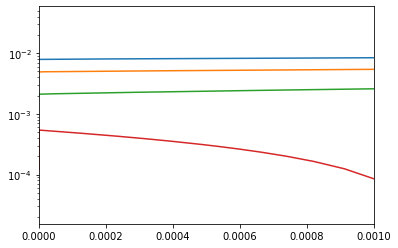

In [76]:
import scipy.integrate as si 

def deriv( r, y, rArr_np, P_np, dPdr_np, Q_np, W_np, omega2):
    un = y[0]
    dundr = y[1]
     
    P = np.interp(r, rArr_np, P_np)
    Q = np.interp(r, rArr_np, Q_np)
    W = np.interp(r, rArr_np, W_np)
    dPdr = np.interp(r, rArr_np, dPdr_np)

    d2undr2 = -(dundr*dPdr/P + (Q + omega2*W)*un/P)
    #print((Q + omega2*W)/Q)
    return [dundr, d2undr2]   

# read in the initial data
r_SchwArr_np,rhoArr_np,rho_baryonArr_np,PArr_np,mArr_np,exp2phiArr_np,confFactor_exp4phi_np,rbarArr_np = np.loadtxt(tov_file, unpack=True)

gamma = 2
boolArray = rhoArr_np > 0
expnu = exp2phiArr_np[boolArray]
explambda = 1./(1- 2*mArr_np/r_SchwArr_np**2)[boolArray]


expnu_half_np = np.sqrt(expnu)
explambda_half_np = np.sqrt(explambda)

r_SchwArr_np = r_SchwArr_np[boolArray]
rhoArr_np = rhoArr_np[boolArray]
PArr_np = PArr_np[boolArray]

Phi_np = expnu_half_np**3*explambda_half_np/r_SchwArr_np**2
P_np = Phi_np*PArr_np*gamma
dpdr_np = np.zeros(P_np.size)
drhodr_np = np.zeros(P_np.size)
drhodr_np[:-1] = (rhoArr_np[1:]-rhoArr_np[:-1])/(r_SchwArr_np[1:] - r_SchwArr_np[:-1])
drhodr_np[-1] = drhodr_np[-2]
dpdr_np[:-1] = (PArr_np[1:]-PArr_np[:-1])/(r_SchwArr_np[1:] - r_SchwArr_np[:-1])
dpdr_np[-1] = dpdr_np[-2] # copy over the last one
enthalpy_np = (PArr_np+rhoArr_np)

Q_np = -4*Phi_np/r_SchwArr_np*dpdr_np - 8*np.pi*explambda*Phi_np*PArr_np*enthalpy_np + Phi_np/enthalpy_np*dpdr_np**2

W_np = Phi_np/expnu*explambda*enthalpy_np

dPdr_np = np.zeros(P_np.size)
dPdr_np[:-1] = (P_np[1:] - P_np[:-1])/(r_SchwArr_np[1:] - r_SchwArr_np[:-1]) 
dPdr_np[-1] = dPdr_np[-2]

s = drhodr_np[-1]/rhoArr_np[-1]/(dpdr_np[-1]/PArr_np[-1]-drhodr_np[-1]/rhoArr_np[-1])
print(s)
dpdr_np[-1]
un_prev = 1

import matplotlib.pyplot as pl
pl.clf()
# do an initial scan
eigenguess = [1.05, 8.3]
#for n in np.arange(1, 10, 0.1) : 
for n in np.arange(0.9, 1.3, 0.1) : 

    
    omega2 = n*rho_baryonArr_np[0]

    r = si.ode(deriv).set_integrator('dopri5')

    # integrate out a little bit
    r0 = 1e-3

    un = r0**3
    y0 = [un, 3*r0**2]

    r.set_initial_value(y0, r0).set_f_params(r_SchwArr_np, P_np, dPdr_np, Q_np, W_np, omega2)

    R = r_SchwArr_np[-1]
    dr = (R-r0)*1e-3

    r_arr = []
    un_arr = []
    dundr_arr = []

    while r.successful() and r.t < R-1e-10 and un < 1e5: 
        dr = min(max((R-r.t)*1e-1, 1e-10), R-r.t-1e-10)
        r_arr.append(r.t+dr)
        un, dundr = r.integrate(r.t+dr)
        un_arr.append(un) 
        dundr_arr.append(dundr)
        
    if( un/un_prev < 0 ) : #sign change
        print( n, omega2)
    un_prev = un
    
    print(n, un)
    r_arr = np.array(r_arr)
    un_arr = np.array( un_arr)
    #print( n, np.abs(dundr), np.abs(un_arr[-1])/np.abs(un_arr[-2])/((R-r_arr[-1])**(-s)/(R-r_arr[-2])**(-s)))
    pl.semilogy(R-r_arr, np.abs(un_arr)/(R-r_arr)**(-s))
    pl.xlim(0,1e-3)

pl.show()

